In [1]:
# Install required packages in the current Jupyter kernel
# Uncomment the following lines if you need to install these libraries
# If you run into permission issues, try with the --user option
#import sys
#!pip install -q rdflib networkx matplotlib
#!{sys.executable} -m pip install rdflib networkx matplotlib pandas stringdb --user


In [1]:
%load_ext autoreload
%autoreload 2
import sampler
import grabhogs_sparql
import map2string_fast
import rdflib
import SPARQLWrapper
import colour
import itertools
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
datapath = '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/STRING/rdf/protein.links.rdf.v11.5/402676.protein.links.rdf.v11.5.txt.gz'
# RDF graph loading
rg = sampler.load_graph(datapath)

rdflib Graph loaded successfully with 2620310 triples


In [3]:
subjs = rg.subjects( unique = True)
subg = sampler.sample(rg , subject_iter = subjs , layer_limit= 2 , sample_run = 10)
print(subg)

seed https://string-db.org/network/402676.B6JZA9
[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'Memory']].


In [5]:
datapath2 = '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/STRING/rdf/protein.info.rdf.v11.5/402676.protein.info.rdf.v11.5.txt.gz'
# RDF graph loading
rg_info  = sampler.load_graph(datapath2)
string_ids_dict , subg = sampler.add_xrefs( rg_info , subg )

rdflib Graph loaded successfully with 14559 triples
[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'Memory']].


In [6]:
proteins_by_species , results_subj_para , results_subj_ortho , results_obj_para , results_obj_ortho = grabhogs_sparql.grab_hogs( G , subg )

Total time for 576 SPARQL queries: 62.03526449203491 seconds (multiple batch calls in: 0 cases)
Num errors: 0


In [11]:
results_string_per_protein = map2string_fast.mapall(proteins_by_species , serverurl= "http://dna078:3030/string_fuseki/sparql" )

NameError: name 'traceback' is not defined

In [ ]:
#sample response
import time
start_time = time.time()
results_obj_para = grabhogs_sparql.query_orthologs("<http://purl.uniprot.org/uniprot/B6JXK8>", SPARQLWrapper.SPARQLWrapper("https://sparql.omabrowser.org/sparql/"))

end_time = time.time()
print("Total time : {} seconds".format(end_time - start_time))

In [ ]:
# example usage
uniprot_id = "http://purl.uniprot.org/uniprot/A0A3B5R6M3" 
serverurl = '
results =  map2string_fast.map2string_SPARQL(uniprot_id , serverurl = )
print(results)

In [4]:
G = rdflib.extras.external_graph_libs.rdflib_to_networkx_multidigraph( subg , lambda s, p, o: {'data':{'key':p  , 'weight':1} } )

In [31]:

preds = [ p for p in rg.predicates( unique = True)]

red = colour.Color('red')
blue = colour.Color('blue')
c = [ c.hex_l for c in  list(red.range_to(blue, len(preds))) ]
colors = { p:c[i] for i,p in enumerate(preds)}
delta = 2/len(preds)
curve = { p:delta*i for i,p in enumerate(preds) }
style = itertools.cycle([ '-', '--' ])
line_style = { p:next(style) for p in preds }

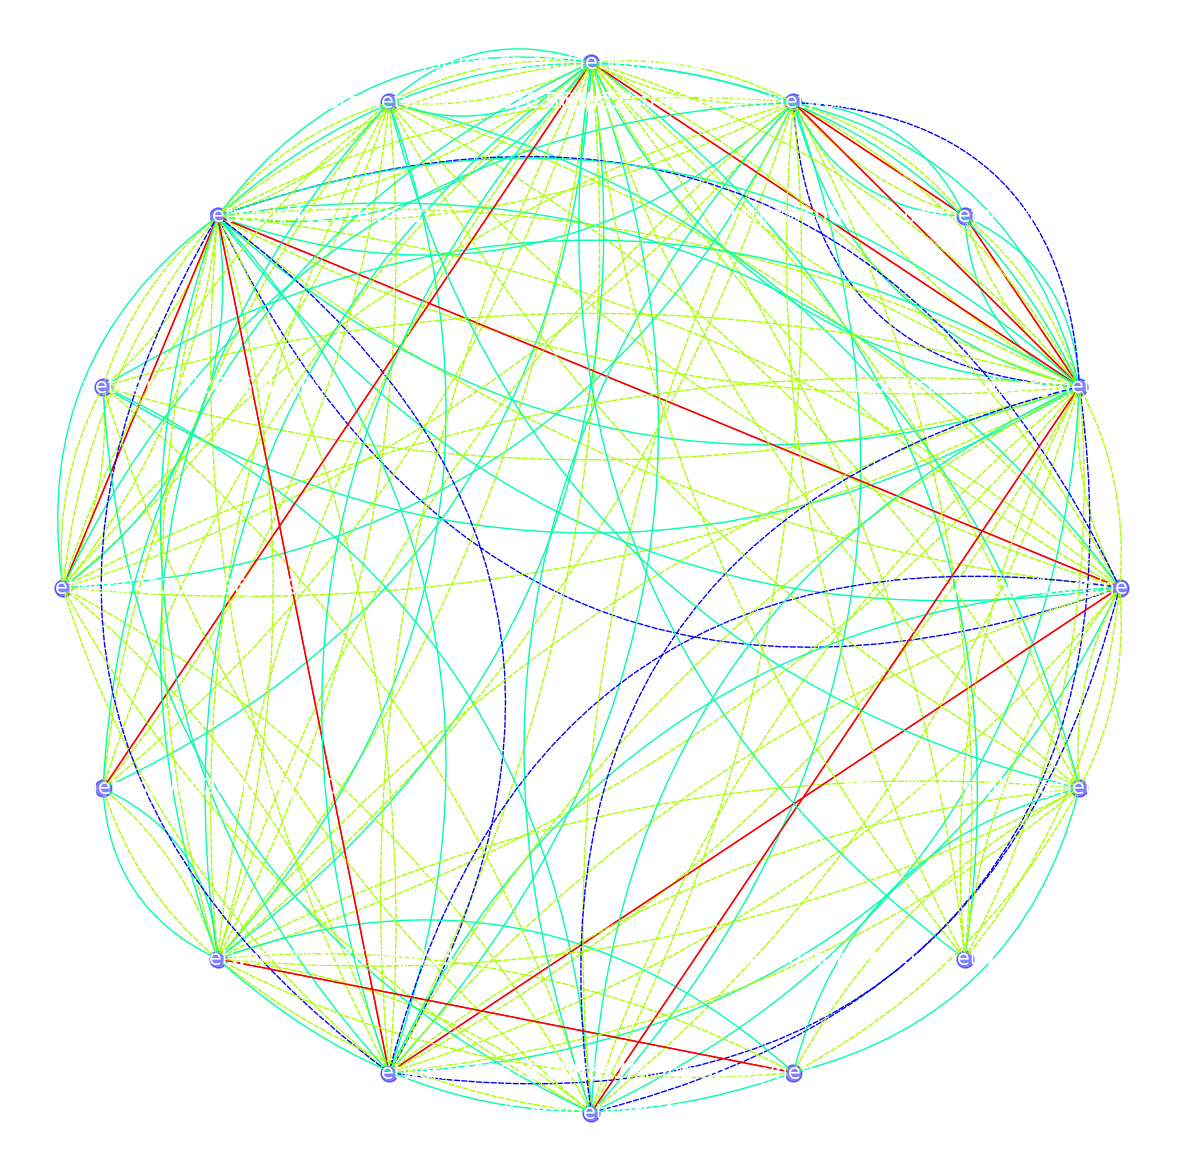

In [37]:
pos = nx.circular_layout( G )
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.plot()
#plot the whole mess
ax = plt.gca()
for e in G.edges(data = True):
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", color=colors[e[2]['data']['key']],
                                shrinkA=5, shrinkB=5, lw = e[2]['data']['weight'], ls = line_style[e[2]['data']['key']],
                                patchA=None, patchB=None, alpha = e[2]['data']['weight'],
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*curve[e[2]['data']['key']])
                                ),
                                ),
                )

nx.draw_networkx_nodes(G, pos, node_color = 'b', node_size = 150, alpha = .5)
labels=nx.draw_networkx_labels(G , pos = pos , font_size= 15 , font_color='w')

plt.axis('off')
plt.show()


In [ ]:
#load bloom filters for string data
import pickle
import glob
def check_filters(val,filters = filters):
    for f in filters:
        if val in f[0][0]:
            return True
    return False
filters = './filters/bloomfinal_big*.pkl'
filters = glob.glob(filters)
filters = [ pickle.load(open(f, 'rb')) for f in filters ]
#check bloom filters for interactors in diff species
print(check_filters('crap'))
print(check_filters('23.BEL05_00185 _23.BEL05_00025 '.encode()))
print(check_filters('23.BEL05_00045 23.BEL05_02665'))

In [ ]:
import itertools

#take the proteins in each species and do an all v all check for interactions
def make_string_subgraphs(proteins_by_species, stringmap):
    for spec in proteins_by_species:
        subgraphs = {}
        if len(proteins_by_species)> 1:
            subg = nx.Graph()
            for p1,p2 in itertools.combinations(proteins_by_species[spec],2):
                if (check_filters(stringmap[p1]+'_'+stringmap[p2]) or check_filters(stringmap[p2]+'_'+stringmap[p1]) ) == True:
                    subg.add_edge(p1,p2)
            subgraphs[spec] = subg
def link_ortho(subgraphs, results_subj_para , results_subj_ortho , results_obj_para , results_obj_ortho ):
    #construct the graph for a subnetwork in each species
    

In [ ]:
#map string neighbours to OMA entries

#jump a few steps in HOGs

#fish for STRING interactions in other species


